<a href="https://colab.research.google.com/github/agravatmanas07/data-analysis-projects/blob/main/EX2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

data = pd.read_csv(r'/content/Movie-Ratings.csv')



In [ ]:
rt = data.sort_values('Audience Ratings %', ascending=False)
print("Top movies by Audience Ratings %:")
print(rt[['Film', 'Audience Ratings %']])

Top movies by Audience Ratings %:
                              Film  Audience Ratings %
406                The Dark Knight                  96
9                            50/50                  93
530                        Warrior                  93
190                      Inception                  93
33                         Avatar                   92
..                             ...                 ...
426  The Haunting of Molly Hartley                  22
367                          Stone                  20
351                        Skyline                  19
354             Something Borrowed                   0
293          Paranormal Activity 2                   0

[559 rows x 2 columns]


In [ ]:


avg_budget = data.groupby('Genre')['Budget (million $)']
print("\nAverage budget by genre:")
d={ i:0 for i in set(data["Genre"])}
for i in data["Genre"]:
  d[i]=d[i]+1
print(d)


Average budget by genre:
{'Thriller': 36, 'Action': 154, 'Romance': 18, 'Horror': 49, 'Comedy': 172, 'Adventure': 29, 'Drama': 101}


In [ ]:
import pandas as pd

data = pd.read_csv(r'/content/Movie-Ratings.csv') # make sure this cell is run before the cell that generated the error

m_r = data.groupby('Genre')['Audience Ratings %'].max().sort_values(ascending=False)
print("Maximum Audience Ratings % for each genre:")
d={ i:0 for i in set(data["Genre"])} # removed ['Audience Ratings %'] as it was causing the KeyError
for i in data["Genre"]:
  d[i]=d[i]+1
print(d)

Maximum Audience Ratings % for each genre:
{'Romance': 18, 'Drama': 101, 'Action': 154, 'Thriller': 36, 'Horror': 49, 'Comedy': 172, 'Adventure': 29}


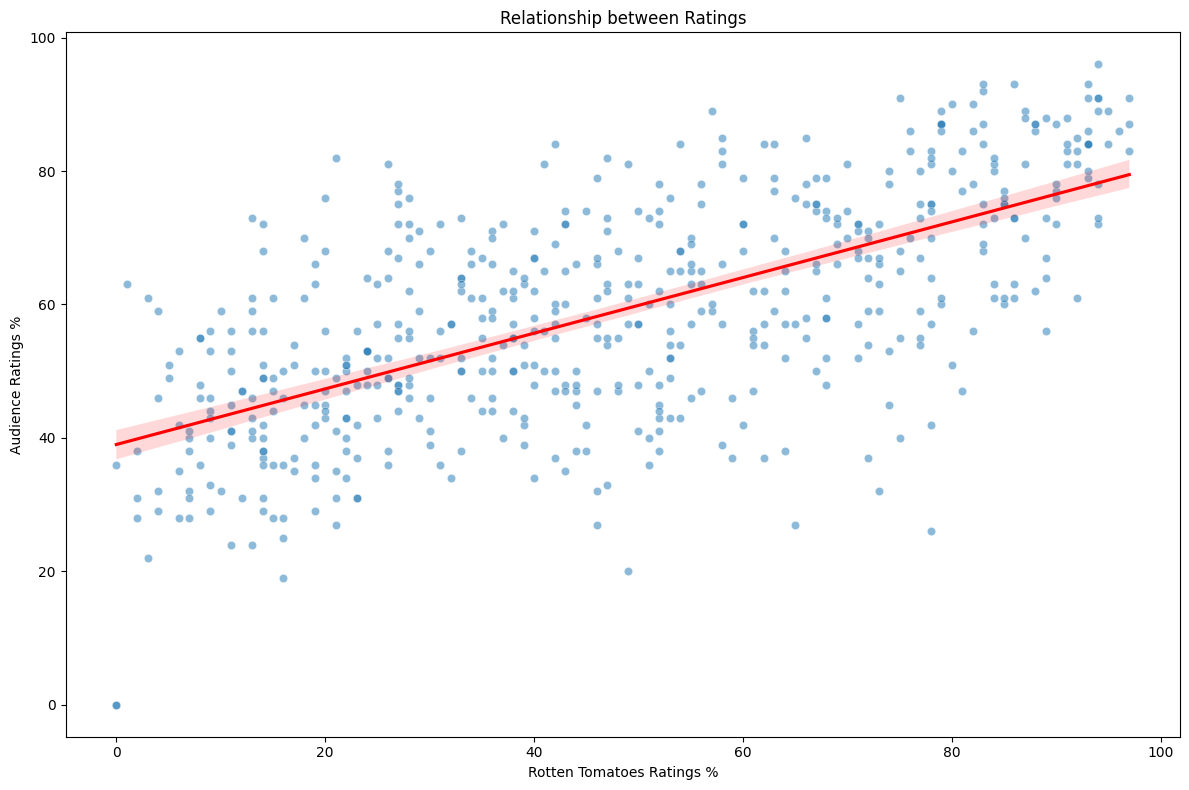

In [ ]:
data['Rotten Tomatoes Ratings %'] = pd.to_numeric(data['Rotten Tomatoes Ratings %'], errors='coerce')
data['Audience Ratings %'] = pd.to_numeric(data['Audience Ratings %'], errors='coerce')
data = data.dropna(subset=['Rotten Tomatoes Ratings %', 'Audience Ratings %'])

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Rotten Tomatoes Ratings %', y='Audience Ratings %', data=data, alpha=0.5)

plt.title('Relationship between Ratings')
plt.xlabel('Rotten Tomatoes Ratings %')
plt.ylabel('Audience Ratings %')

sns.regplot(x='Rotten Tomatoes Ratings %', y='Audience Ratings %', data=data, scatter=False, color='red')

plt.tight_layout()
plt.show()

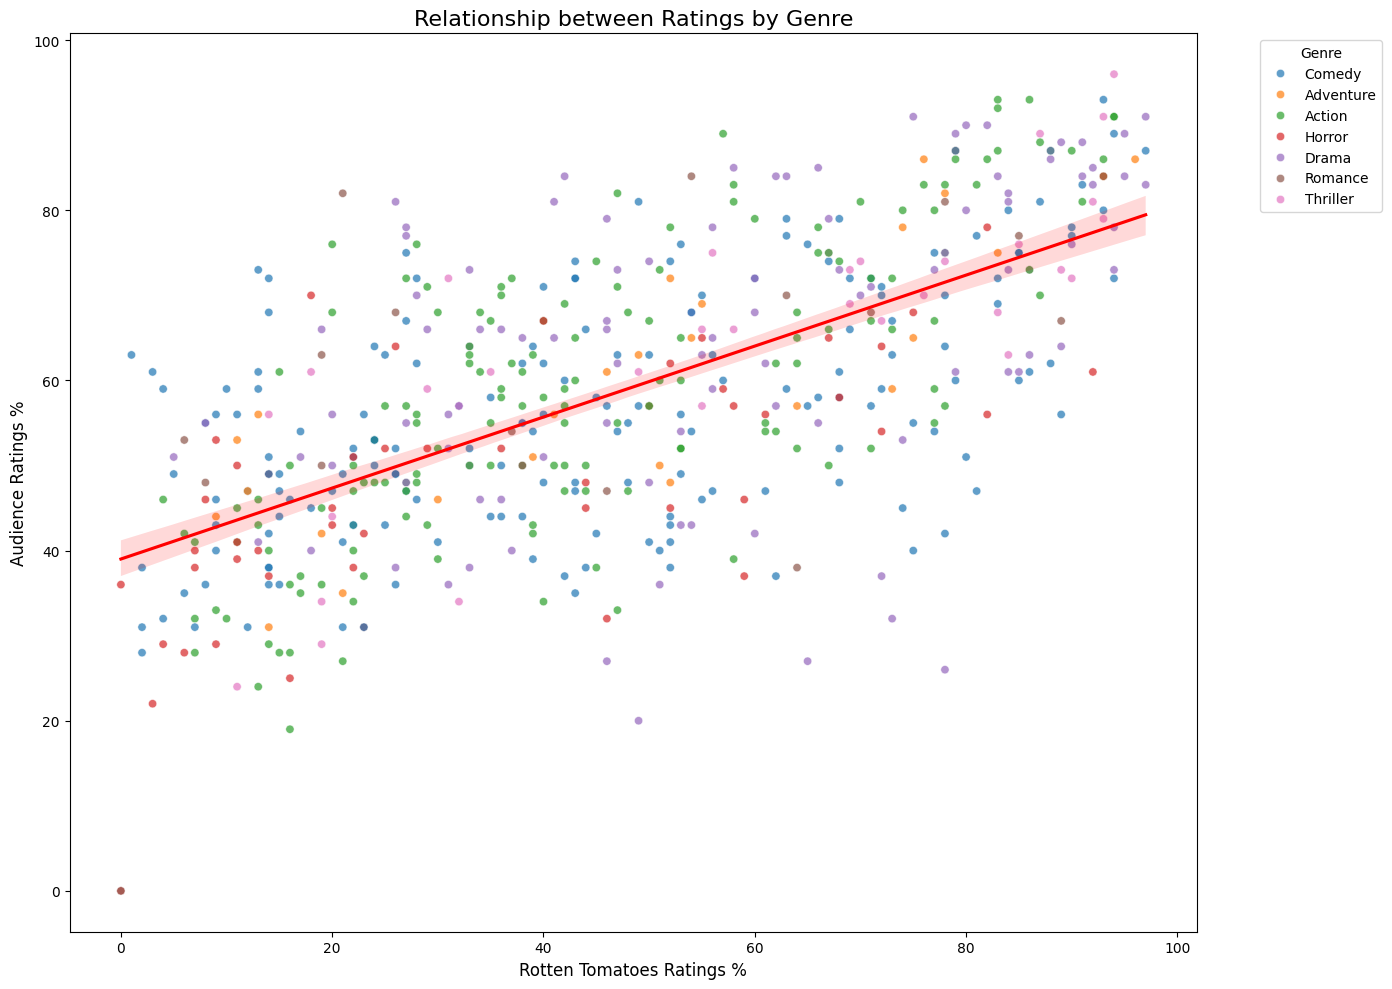

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' is your DataFrame
# Convert ratings to numeric and drop NaN values
data['Rotten Tomatoes Ratings %'] = pd.to_numeric(data['Rotten Tomatoes Ratings %'], errors='coerce')
data['Audience Ratings %'] = pd.to_numeric(data['Audience Ratings %'], errors='coerce')
data = data.dropna(subset=['Rotten Tomatoes Ratings %', 'Audience Ratings %', 'Genre']) # Changed 'genre' to 'Genre'

# Create the plot
plt.figure(figsize=(14, 10))

# Scatter plot with genre-based coloring
sns.scatterplot(x='Rotten Tomatoes Ratings %',
                y='Audience Ratings %',
                hue='Genre',  # Changed 'genre' to 'Genre'
                data=data,
                alpha=0.7)

# Add regression line
sns.regplot(x='Rotten Tomatoes Ratings %',
            y='Audience Ratings %',
            data=data,
            scatter=False,
            color='red')

# Customize the plot
plt.title('Relationship between Ratings by Genre', fontsize=16)
plt.xlabel('Rotten Tomatoes Ratings %', fontsize=12)
plt.ylabel('Audience Ratings %', fontsize=12)

# Adjust legend
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Film                       559 non-null    object
 1   Genre                      559 non-null    object
 2   Rotten Tomatoes Ratings %  559 non-null    int64 
 3   Audience Ratings %         559 non-null    int64 
 4   Budget (million $)         559 non-null    int64 
 5   Year of release            559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [ ]:
data.describe()

,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


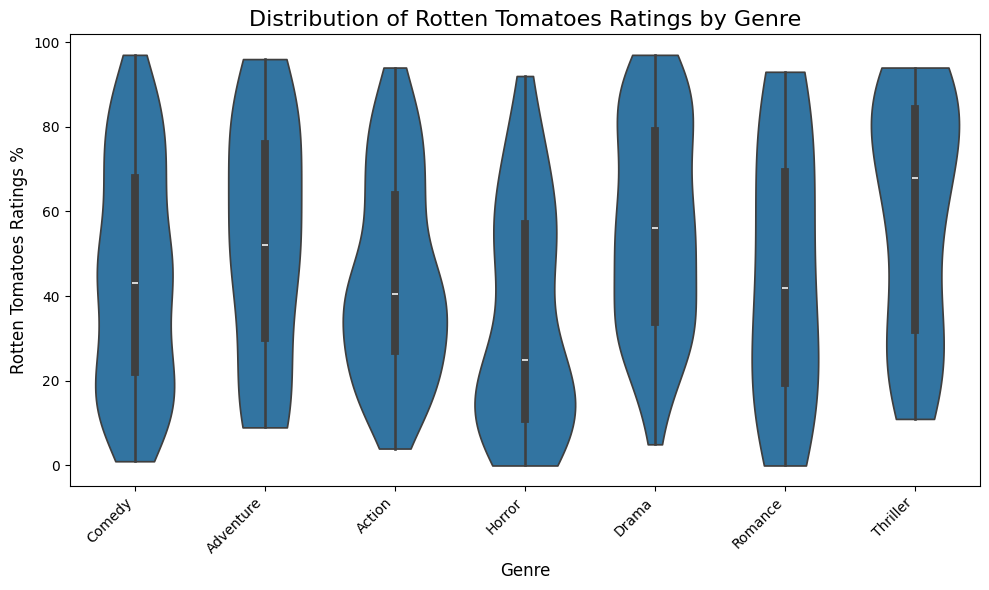

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' is your DataFrame
# Convert ratings to numeric and drop NaN values
data['Rotten Tomatoes Ratings %'] = pd.to_numeric(data['Rotten Tomatoes Ratings %'], errors='coerce')
data['Audience Ratings %'] = pd.to_numeric(data['Audience Ratings %'], errors='coerce')
data = data.dropna(subset=['Rotten Tomatoes Ratings %', 'Audience Ratings %', 'Genre'])

# Create the plot
plt.figure(figsize=(10, 6))

# Violin plot
sns.violinplot(x='Genre', y='Rotten Tomatoes Ratings %', data=data, inner="box", cut=0)

# Customize the plot
plt.title('Distribution of Rotten Tomatoes Ratings by Genre', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Rotten Tomatoes Ratings %', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
import pandas as pd

data = pd.read_csv(r'RealEstate_Paris_cleaned_17_12_2019.csv')

print(data.head())

   Unnamed: 0    index  id_mutation date_mutation nature_mutation  \
0      752156  2289411  2018-987606    2018-01-04           Vente   
1      752157  2289412  2018-987607    2018-01-09           Vente   
2      752158  2289415  2018-987609    2018-01-03           Vente   
3      752159  2289416  2018-987610    2018-01-03           Vente   
4      752160  2289417  2018-987611    2018-01-05           Vente   

   valeur_fonciere  adresse_numero adresse_suffixe  \
0        1202000.0            10.0             NaN   
1         130000.0            20.0             NaN   
2          15000.0            12.0             NaN   
3         650000.0           174.0             NaN   
4           3000.0           187.0             NaN   

               adresse_nom_voie adresse_code_voie  ...  surface_reelle_bati  \
0                    AV PERCIER              7250  ...                120.0   
1              RUE SAINT CLAUDE              8520  ...                 22.0   
2                     R

<ipython-input-13-bf1d094b186c>:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r'RealEstate_Paris_cleaned_17_12_2019.csv')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21121 entries, 0 to 21120
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 21121 non-null  int64  
 1   index                      21121 non-null  int64  
 2   id_mutation                21121 non-null  object 
 3   date_mutation              21121 non-null  object 
 4   nature_mutation            21121 non-null  object 
 5   valeur_fonciere            21121 non-null  float64
 6   adresse_numero             21121 non-null  float64
 7   adresse_suffixe            803 non-null    object 
 8   adresse_nom_voie           21097 non-null  object 
 9   adresse_code_voie          21121 non-null  object 
 10  code_postal                21121 non-null  float64
 11  code_commune               21121 non-null  int64  
 12  nom_commune                21121 non-null  object 
 13  code_departement           21121 non-null  int

In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame
data = pd.read_csv(r'RealEstate_Paris_cleaned_17_12_2019.csv')

# Count NaN values in specified columns
nan_count = data[['adresse_suffixe','adresse_nom_voie','lot1_surface_carrez','lot2_surface_carrez','lot3_surface_carrez','lot4_surface_carrez','lot5_surface_carrez','code_nature_culture','nature_culture','surface_terrain']].isnull().sum()

# Check if NaN values in 'adresse_suffixe' exceed the threshold
# Note: This condition will likely never be met as nan_count is a Series
if nan_count['adresse_suffixe'] > 21121:
    data = data.dropna(subset=['adresse_suffixe'])

# Now 'data' will have rows with null values in 'adresse_suffixe' removed if the condition was met
print(data.head())

   Unnamed: 0    index  id_mutation date_mutation nature_mutation  \
0      752156  2289411  2018-987606    2018-01-04           Vente   
1      752157  2289412  2018-987607    2018-01-09           Vente   
2      752158  2289415  2018-987609    2018-01-03           Vente   
3      752159  2289416  2018-987610    2018-01-03           Vente   
4      752160  2289417  2018-987611    2018-01-05           Vente   

   valeur_fonciere  adresse_numero adresse_suffixe  \
0        1202000.0            10.0             NaN   
1         130000.0            20.0             NaN   
2          15000.0            12.0             NaN   
3         650000.0           174.0             NaN   
4           3000.0           187.0             NaN   

               adresse_nom_voie adresse_code_voie  ...  surface_reelle_bati  \
0                    AV PERCIER              7250  ...                120.0   
1              RUE SAINT CLAUDE              8520  ...                 22.0   
2                     R

<ipython-input-17-cea4165ab305>:4: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r'RealEstate_Paris_cleaned_17_12_2019.csv')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21121 entries, 0 to 21120
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 21121 non-null  int64  
 1   index                      21121 non-null  int64  
 2   id_mutation                21121 non-null  object 
 3   date_mutation              21121 non-null  object 
 4   nature_mutation            21121 non-null  object 
 5   valeur_fonciere            21121 non-null  float64
 6   adresse_numero             21121 non-null  float64
 7   adresse_suffixe            803 non-null    object 
 8   adresse_nom_voie           21097 non-null  object 
 9   adresse_code_voie          21121 non-null  object 
 10  code_postal                21121 non-null  float64
 11  code_commune               21121 non-null  int64  
 12  nom_commune                21121 non-null  object 
 13  code_departement           21121 non-null  int